Data Analysis

1.) Since the correlation between mouse weight and tumor volume is 0.53, this means that there is a moderate positive relationship between the two variables, so as mouse weight increases so does tumor volume. 

2.) Based on the line plot, there is a clear decline in tumor volume for mouse x401 with Pymaceuticals' drug of interest, Capomulin, over the course of 45 days, suggesting it is an effective treatment for SCC tumor growth. 

3.) When compared against three other drugs (Ramicane, Infubinol, and Ceftamin), Capomuline had the smallest IQR, suggesting the middle portion of the data more consistently shows similar values. Based on the box and whisker plot, Capomuline led to a much lower tumor volume in its mice compared to Infubinol and Ceftamin, but it was slightly higher than Ramicane.

## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = mouse_metadata.merge(study_results)

# Display the data table for preview
mouse_study_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = mouse_study_merge["Mouse ID"].value_counts()
mice_count

g989    13
k382    10
t198    10
q787    10
b559    10
        ..
l872     1
o848     1
x336     1
b447     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_merge[mouse_study_merge.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df.drop(df.index[df['Col1'] == 0], inplace=True)
mouse_study_merge.drop(mouse_study_merge.index[mouse_study_merge["Mouse ID"] == 'g989'], inplace=True)
mouse_study_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = mouse_study_merge["Mouse ID"].value_counts()
new_mice_count

k382    10
t198    10
q787    10
b559    10
c282    10
        ..
b447     1
x336     1
l872     1
o848     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties 
#of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor = mouse_study_merge.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = mouse_study_merge.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = mouse_study_merge.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sta_dev_tumor = mouse_study_merge.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = mouse_study_merge.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats_df = pd.DataFrame({"Mean of Tumor Volume": mean_tumor,
                              "Median of Tumor Volume": median_tumor,
                              "Variance of Tumor Volume": var_tumor,
                              "Standard Deviation of Tumor Volume": sta_dev_tumor, 
                              "SEM of Tumor Volume": sem_tumor})                                  
summary_stats_df

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drugs_aggr = pd.DataFrame(pd.value_counts(mouse_study_merge["Drug Regimen"]))
drugs_aggr

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,148


## Bar and Pie Charts

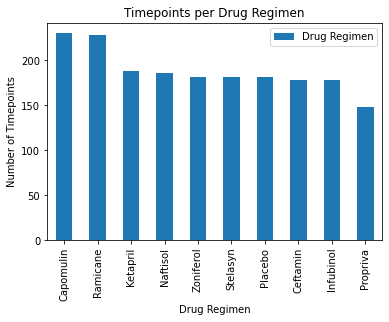

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugs_aggr.plot(kind="bar")
plt.title("Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

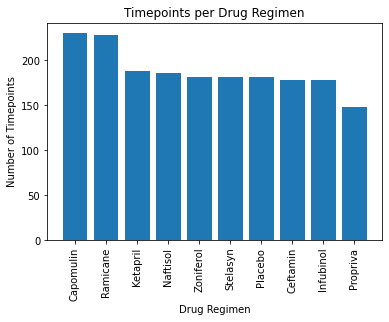

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_study_merge["Drug Regimen"].value_counts().index
y_axis = mouse_study_merge["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.title("Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

In [9]:
#male mice count
m =  mouse_study_merge.loc[ mouse_study_merge["Sex"] == "Male"]
m_tot = len(pd.unique(m["Mouse ID"]))
print(f"The total number of male mice is {m_tot}.")
#female mice count
f =  mouse_study_merge.loc[ mouse_study_merge["Sex"] == "Female"]
f_tot = len(pd.unique(f["Mouse ID"]))
print(f"The total number of female mice is {f_tot}.")


The total number of male mice is 125.
The total number of female mice is 123.


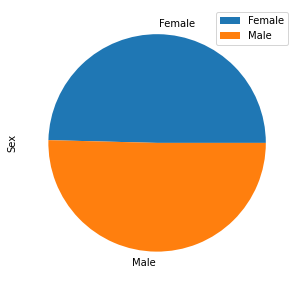

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df = pd.DataFrame({'Sex': [123, 125]},
                  index=['Female', 'Male'])
plot = df.plot.pie(y='Sex', figsize=(5, 5))


([<matplotlib.patches.Wedge at 0x25e0c4e22e0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

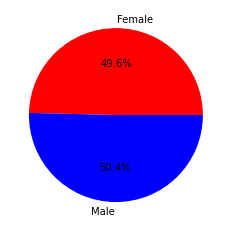

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [123, 125]
colors = ["red", "blue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

In [36]:
Capomulin = mouse_study_merge.loc[mouse_study_merge["Drug Regimen"] == "Capomulin"]
print("Drug: Capomulin")
print("")

x_axis_Ca = Capomulin["Tumor Volume (mm3)"]

quartiles_Ca = x_axis_Ca.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]
iqr_Ca = upperq_Ca-lowerq_Ca

print(f"The lower quartile of Capomulin is: {lowerq_Ca}.")
print(f"The upper quartile of Capomulin is: {upperq_Ca}.")
print(f"The interquartile range of Capomulin is: {iqr_Ca}.")
print(f"The median of Capomulin is: {quartiles_Ca[0.5]}.")
print("")

lower_bound_Ca = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_Ca = upperq_Ca + (1.5*iqr_Ca)

print(f"Values below {lower_bound_Ca} could be outliers.")
print(f"Values above {upper_bound_Ca} could be outliers.")

Drug: Capomulin

The lower quartile of Capomulin is: 37.685932865.
The upper quartile of Capomulin is: 45.0.
The interquartile range of Capomulin is: 7.314067135000002.
The median of Capomulin is: 41.557808879999996.

Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [37]:
Ramicane = mouse_study_merge.loc[mouse_study_merge["Drug Regimen"] == "Ramicane"]
print("Drug: Ramicane")
print("")

x_axis_R = Ramicane["Tumor Volume (mm3)"]

quartiles_R = x_axis_R.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]
iqr_R = upperq_R-lowerq_R

print(f"The lower quartile of Ramicane is: {lowerq_R}.")
print(f"The upper quartile of Ramicane is: {upperq_R}.")
print(f"The interquartile range of Ramicane is: {iqr_R}.")
print(f"The the median of Ramicane is: {quartiles_R[0.5]}.")
print("")

lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)

print(f"Values below {lower_bound_R} could be outliers.")
print(f"Values above {upper_bound_R} could be outliers.")

Drug: Ramicane

The lower quartile of Ramicane is: 36.674634585.
The upper quartile of Ramicane is: 45.0.
The interquartile range of Ramicane is: 8.325365415.
The the median of Ramicane is: 40.67323554.

Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.


In [39]:
Infubinol = mouse_study_merge.loc[mouse_study_merge["Drug Regimen"] == "Infubinol"]
print("Drug: Infubinol")
print("")

x_axis_I = Infubinol["Tumor Volume (mm3)"]

quartiles_I = x_axis_I.quantile([.25,.5,.75])
lowerq_I = quartiles_I[0.25]
upperq_I = quartiles_I[0.75]
iqr_I = upperq_I-lowerq_I

print(f"The lower quartile of Infubinol is: {lowerq_I}.")
print(f"The upper quartile of Infubinol is: {upperq_I}.")
print(f"The interquartile range of Infubinol is: {iqr_I}.")
print(f"The the median of Infubinol is: {quartiles_I[0.5]}.")
print("")

lower_bound_I = lowerq_I - (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)

print(f"Values below {lower_bound_I} could be outliers.")
print(f"Values above {upper_bound_I} could be outliers.")

Drug: Infubinol

The lower quartile of Infubinol is: 47.3123533.
The upper quartile of Infubinol is: 57.314443967500004.
The interquartile range of Infubinol is: 10.002090667500006.
The the median of Infubinol is: 51.82058438.

Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [40]:
Ceftamin = mouse_study_merge.loc[mouse_study_merge["Drug Regimen"] == "Ceftamin"]
print("Drug: Ceftamin")
print("")

x_axis_Ce = Ceftamin["Tumor Volume (mm3)"]

quartiles_Ce = x_axis_Ce.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce

print(f"The lower quartile of Ceftamin is: {lowerq_Ce}.")
print(f"The upper quartile of Ceftamin is: {upperq_Ce}.")
print(f"The interquartile range of Ceftamin is: {iqr_Ce}.")
print(f"The the median of Ceftamin is: {quartiles_Ce[0.5]}.")
print("")

lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)

print(f"Values below {lower_bound_Ce} could be outliers.")
print(f"Values above {upper_bound_Ce} could be outliers.")

Drug: Ceftamin

The lower quartile of Ceftamin is: 47.2084271125.
The upper quartile of Ceftamin is: 56.801437570000004.
The interquartile range of Ceftamin is: 9.593010457500007.
The the median of Ceftamin is: 51.77615728.

Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.


<ipython-input-42-6db8ec5b284c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


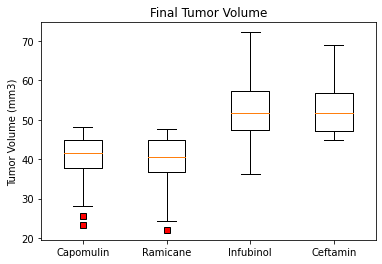

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol = (x_axis_Ca, x_axis_R, x_axis_I, x_axis_Ce)
fig1, ax1 = plt.subplots()

ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

#Change style of outliers
red_square = dict(markerfacecolor='r', marker='s')

ax1.boxplot(tumor_vol, flierprops=red_square)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

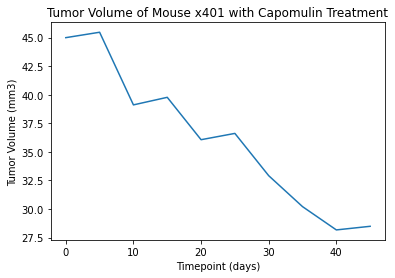

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoint = mouse_study_merge.loc[mouse_study_merge["Mouse ID"] == "x401"]
timepoint = timepoint["Timepoint"]

tumor_volume = mouse_study_merge.loc[mouse_study_merge["Mouse ID"] == "x401"]
tumor_volume = tumor_volume["Tumor Volume (mm3)"]

plt.plot(timepoint, tumor_volume)
plt.title("Tumor Volume of Mouse x401 with Capomulin Treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

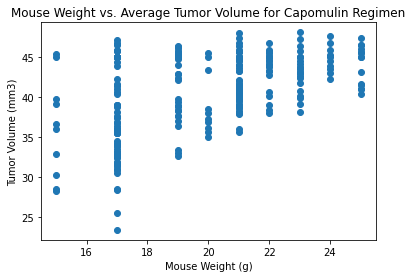

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = mouse_study_merge.loc[mouse_study_merge["Drug Regimen"] == "Capomulin"]

mouse_weight = capomulin_scatter["Weight (g)"]
tumor_volume = capomulin_scatter["Tumor Volume (mm3)"]

plt.scatter(mouse_weight, tumor_volume)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both weight and tumor volume is 0.53.
The linear regression model is y = 0.96x + 21.49.


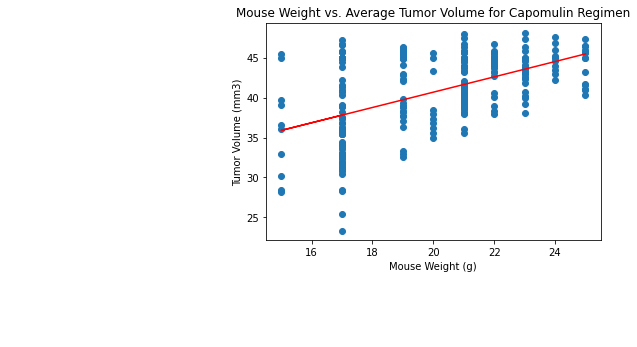

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}.")

mouse_weight = capomulin_scatter["Weight (g)"]
tumor_volume = capomulin_scatter["Tumor Volume (mm3)"]

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")

plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()